In [641]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [642]:
# Импортирование CSV
df = pd.read_csv('student-mat.csv', sep = ',') # DataFrame
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


О наборе данных
=========
# Контекст:
Данные были получены в ходе опроса учащихся курсов математики и португальского языка в средней школе. Он содержит много интересной социальной, гендерной и учебной информации о студентах.

# Содержание:
Атрибуты для наборов данных Student-mat.csv (курс математики) и Student-por.csv (курс португальского языка):
```
school - школа ученика (двоичный код: 'GP' - Габриэль Перейра или 'MS' - Мусиньо да Силвейра)
sex — пол студента (двоичный код: «Ж» — женский или «М» — мужской)
age - возраст ученика (числовой: от 15 до 22)
address - тип домашнего адреса студента (двоичный: 'U' - городской или 'R' - сельский)
famsize — размер семейства (двоичный: «LE3» — меньше или равно 3 или «GT3» — больше 3)
Pstatus — статус совместного проживания родителей (двоичный код: «Т» — проживание вместе или «А» — раздельно)
Medu — образование матери (числовое: 0 — нет, 1 — начальное образование (4 класс), 2 — с 5 по 9 классы, 3 — среднее образование или 4 — высшее образование)
Fedu — образование отца (числовое: 0 — нет, 1 — начальное образование (4 класс), 2 — с 5 по 9 классы, 3 — среднее образование или 4 — высшее образование)
Mjob - работа матери (номинал: «учитель», «связанный со здравоохранением», гражданские «службы» (например, административные или полицейские), «на дому» или «другое»)
Fjob - работа отца (номинал: «учитель», «связанный со здравоохранением», гражданские «службы» (например, административные или полицейские), «на дому» или «другое»)
reason - причина выбрать эту школу (номинал: близок к «дому», «репутация» школы, предпочтение «курса» или «другое»)
guardian - опекун ученика (номинальное: «мать», «отец» или «другой»)
traveltime — время в пути домой в школу (числовое: 1 – <15 минут, 2 – 15 – 30 минут, 3 – 30 минут до 1 часа или 4 – >1 часа)
Studytime — еженедельное время обучения (числовое: 1 — <2 часов, 2 — 2–5 часов, 3 — 5–10 часов или 4 — >10 часов)
failures - количество прошлых сбоев класса (числовое: n, если 1<=n<3, иначе 4)
schoolup - дополнительная образовательная поддержка (двоичный код: да или нет)
famsup — образовательная поддержка семьи (двоичный код: да или нет)
paid — дополнительные платные занятия по предмету курса (математика или португальский язык) (двоичный код: да или нет)
activities – внеклассные мероприятия (бинарный вариант: да или нет)
nursery - посещал детский сад (двоичный вариант: да или нет)
higher – хочет получить высшее образование (двоичный вариант: да или нет)
Internet — доступ в Интернет дома (двоичный код: да или нет)
romantic – с романтическими отношениями (бинарный: да или нет)
famrel - качество семейных отношений (числовое: от 1 - очень плохо до 5 - отлично)
freetime – свободное время после школы (числовое: от 1 – очень низкое до 5 – очень высокое)
goout – встреча с друзьями (числовое: от 1 – очень низкий до 5 – очень высокий)
Dalc - потребление алкоголя в течение рабочего дня (числовое: от 1 - очень низкое до 5 - очень высокое)
Walc – потребление алкоголя в выходные дни (числовое: от 1 – очень низкое до 5 – очень высокое)
health – текущее состояние здоровья (числовое: от 1 – очень плохое до 5 – очень хорошее)
absences - количество пропусков в школе (числовое: от 0 до 93)
```

Эти оценки связаны с предметом курса (математика или португальский язык):
```
G1 – оценка первого периода (числовая: от 0 до 20)
G2 – оценка за второй период (числовая: от 0 до 20)
G3 — итоговая оценка (числовая: от 0 до 20, выходная цель)
Дополнительное примечание: есть несколько (382) студентов, принадлежащих к обоим наборам данных.
Этих учащихся можно идентифицировать путем поиска идентичных атрибутов, характеризующих каждого учащегося, как показано в прилагаемом файле R.
```


Для чего датасет
====
Датасет "Student Alcohol Consumption" содержит информацию о студентах и в частности о потреблении ими алкоголя. Этот датасет может быть полезен для различных анализов и исследований в области образования и здоровья студентов. Вот несколько причин, почему этот датасет может быть полезным:

    Изучение факторов, влияющих на успеваемость студентов: Вы можете использовать этот датасет, чтобы выяснить, как различные факторы, такие как уровень образования родителей, время, проведенное за учебой, и потребление алкоголя, влияют на успеваемость студентов.

    Анализ влияния здоровья и потребления алкоголя: Датасет включает информацию о здоровье студентов и их потреблении алкоголя. Это может быть полезно для изучения связи между здоровьем и образом жизни студентов.

    Разработка стратегий для улучшения образования: Исследование этого датасета может помочь школам и учебным заведениям разработать стратегии для улучшения успеваемости студентов и их общего благосостояния.

    Предсказание успеваемости студентов: На основе данных о студентах можно попытаться разработать модель для предсказания их будущей успеваемости.

    Анализ социальных и гендерных аспектов образования: Датасет также включает информацию о социальных и гендерных характеристиках студентов, что позволяет изучать социальные тенденции в образовании.

В датасете содержатся различные числовые и категориальные признаки, которые могут быть использованы для проведения анализа и построения моделей машинного обучения. Исследование этого датасета может принести пользу как образовательным учреждениям, так и исследователям в области образования и здоровья.

Задание
----
![Alt text](Task.jpg)

Добавление новых численных показателей (колонок)
---

In [643]:
# Вычисляем суммарное потребление алкоголя
df['total_alcohol_consumption'] = df['Dalc'] + df['Walc']

# Выводим обновленный DataFrame
print(df)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... freetime goout  Dalc  Walc  health absence

Разделение на выборки
---

In [644]:
# Определяем наш целевой столбец и порог для успешной сдачи
target_column_name = 'G3'
passing_grade_threshold = 5  # Пример порога

# Вычисляем среднюю оценку
df['average_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3

# Вычисляем успешную сдачу экзамена (бинарный признак)
df['pass_exam'] = (df[target_column_name] > passing_grade_threshold).astype(int)

# Выбираем все столбцы с типом данных 'object' (строковые значения)
categorical_columns = df.select_dtypes(include=['object']).columns

# Создаем объект OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' для избегания дамми-ловушки

# Применяем кодирование к выбранным столбцам
encoded_data = encoder.fit_transform(df[categorical_columns])

# Преобразуем результат в DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Объединяем закодированные столбцы с исходным DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Удаляем оригинальные категориальные столбцы, так как они больше не нужны
df.drop(categorical_columns, axis=1, inplace=True)

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df.drop([target_column_name, 'pass_exam'], axis=1), df['pass_exam'], test_size=0.2, random_state=42)

# Убедимся, что размерности выборок корректны
print("Размерность X_train:", X_train.shape)
print("Размерность X_test:", X_test.shape)
print("Размерность y_train:", y_train.shape)
print("Размерность y_test:", y_test.shape)

Размерность X_train: (316, 43)
Размерность X_test: (79, 43)
Размерность y_train: (316,)
Размерность y_test: (79,)


c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Метод наименьших квадратов (МНК)
---

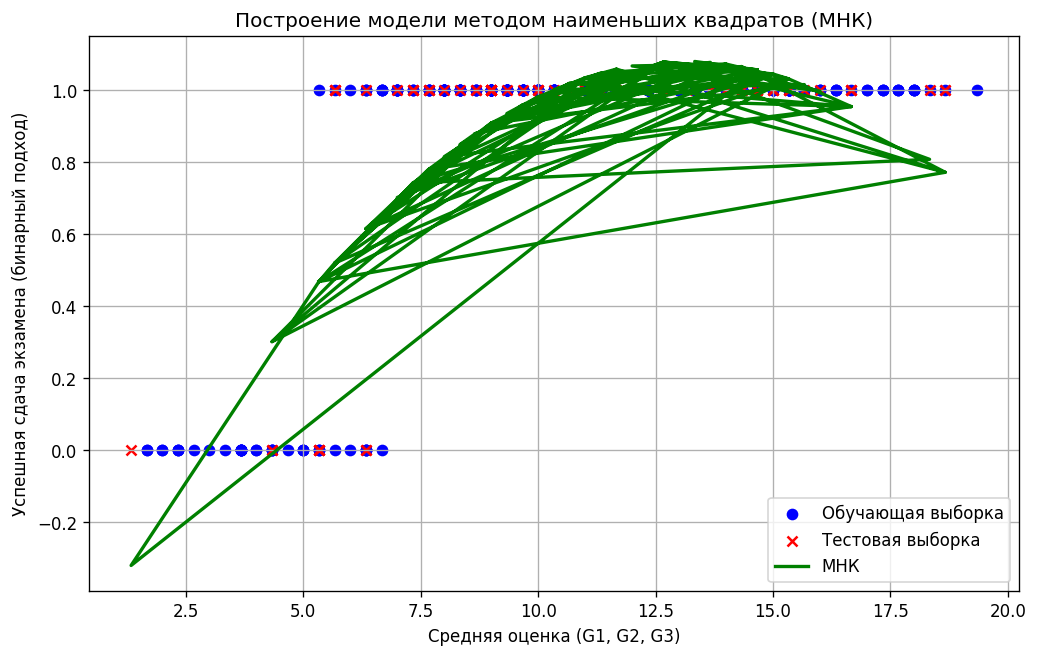

In [645]:
# Определим функцию для аппроксимации методом МНК
def quadratic_function(x, c0, c1, c2):
    return c0 + c1 * x + c2 * x**2

# Обучим модель МНК на обучающих данных
popt, _ = curve_fit(quadratic_function, X_train['average_grade'], y_train)

# Получим коэффициенты c0, c1, c2
c0, c1, c2 = popt

# Создадим значения y_pred_mnk на основе полученных коэффициентов
x_test_values = X_test['average_grade']
y_pred_mnk = quadratic_function(x_test_values, c0, c1, c2)

# Построение графика
plt.figure(figsize=(10, 6))
plt.scatter(X_train['average_grade'], y_train, label='Обучающая выборка', color='blue', marker='o')
plt.scatter(X_test['average_grade'], y_test, label='Тестовая выборка', color='red', marker='x')
plt.plot(x_test_values, y_pred_mnk, label='МНК', color='green', linewidth=2)
plt.xlabel('Средняя оценка (G1, G2, G3)')
plt.ylabel('Успешная сдача экзамена (бинарный подход)')
plt.legend()
plt.title('Построение модели методом наименьших квадратов (МНК)')
plt.grid(True)
plt.show()

# # Создаем матрицу X со столбцами [1, x, x^2]
# # x_train_poly = np.column_stack((np.ones_like(x_train[:, 0]), x_train[:, 0], x_train[:, 1], x_train[:, 0]**2))

# # Определяем функцию для аппроксимации
# def mupping_func(x, c1, c2, c3):
#     return c1 * x**2 + c2 * x + c3

# args, covar = curve_fit(mupping_func, X_train[:, 0], y_train) # Используем только первый столбец x_train

# c1, c2, c3 = args[0], args[1], args[2]

# res_y = c1 * X_train[:, 0]**2 + c2 * X_train[:, 0] + c3

# # fig = go.Figure()

# # fig.add_trace(go.Scatter( 
# #     x = x_train,
# #     y = y_train,
# #     line = dict(color = 'green', width = 2),
# #     name = 'Данные для обучения'
# # ))

# # Визуализируем результаты
# plt.figure(figsize=(10, 6))
# plt.scatter(X_train[:, 0], y_train, label='Обучающая выборка', color='blue', marker='o')
# plt.scatter(X_test[:, 0], y_test, label='Тестовая выборка', color='red', marker='x')
# plt.plot(X_train[:, 0], res_y, label='Аппроксимация', color='green', linewidth=2)
# plt.xlabel('Средняя оценка (G1, G2, G3)')
# plt.ylabel('Успешная сдача экзамена (бинарный подход)')
# plt.legend()
# plt.title('Аппроксимация данных')
# plt.grid(True)
# plt.show()

# # # Выполняем линейную регрессию с помощью МНК
# # model = LinearRegression()
# # model.fit(x_train_poly, y_train)

# # # Предсказываем значения для тестовой выборки
# # x_test_poly = np.column_stack((np.ones_like(x_test[:, 0]), x_test[:, 0], x_test[:, 1], x_test[:, 0]**2))
# # y_pred_mnk = model.predict(x_test_poly)

# # # Создаем DataFrame для визуализации
# # df_train = pd.DataFrame({'average_grade': x_train[:, 0], 'G3': x_train[:, 1], 'pass_exam': y_train})

# # # Создаем график рассеяния для обучающей выборки
# # fig_train = px.scatter(df_train, x='average_grade', y='pass_exam', color='G3',
# #                        title='График рассеяния (обучающая выборка)', labels={'average_grade': 'Средняя оценка (G1, G2, G3)',
# #                                                                           'pass_exam': 'Успешная сдача экзамена (бинарный подход)'})

# # # Создаем DataFrame для визуализации тестовой выборки и предсказаний
# # df_test = pd.DataFrame({'average_grade': x_test[:, 0], 'G3': x_test[:, 1], 'pass_exam': y_test, 'predicted_pass_exam': y_pred_mnk})

# # # Создаем график рассеяния для тестовой выборки и предсказаний
# # fig_test = px.scatter(df_test, x='average_grade', y='pass_exam', color='G3',
# #                       title='График рассеяния (тестовая выборка и предсказания)', labels={'average_grade': 'Средняя оценка (G1, G2, G3)',
# #                                                                                            'pass_exam': 'Успешная сдача экзамена (бинарный подход)'})

# # fig_test.add_trace(go.Scatter(x=df_test['average_grade'], y=df_test['predicted_pass_exam'], mode='lines',
# #                              name='Предсказанные значения', line=dict(color='green', width=2)))

# # # Отобразим оба графика
# # fig_train.show()
# # fig_test.show()

In [646]:
# # Создаем матрицу X со столбцами [1, x, x^2]
# x = np.column_stack((np.ones_like(x_train), x_train, x_train**2))

# # Выполняем линейную регрессию с помощью МНК
# coefficients, residuals, _, _ = np.linalg.lstsq(x, y_train, rcond=None)

# # Предсказываем значения для тестовой выборки
# x_test = np.column_stack((np.ones_like(x_test), x_test, x_test**2))
# y_pred_mnk = np.dot(x_test, coefficients)

# # Визуализируем результаты
# plt.figure(figsize=(10, 6))
# plt.scatter(x_train[:, 0], y_train, label='Обучающая выборка', color='blue', marker='o')
# plt.scatter(x_test[:, 0], y_test, label='Тестовая выборка', color='red', marker='x')
# plt.plot(x_test, y_pred_mnk, label='МНК', color='green', linewidth=2)
# plt.xlabel('Средняя оценка (G1, G2, G3)')
# plt.ylabel('Успешная сдача экзамена (бинарный подход)')
# plt.legend()
# plt.title('Построение модели методом наименьших квадратов (МНК)')
# plt.grid(True)
# plt.show()

Метод k-ближайших соседей (kNN)
---

c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Точность модели kNN с двумя признаками: 98.73


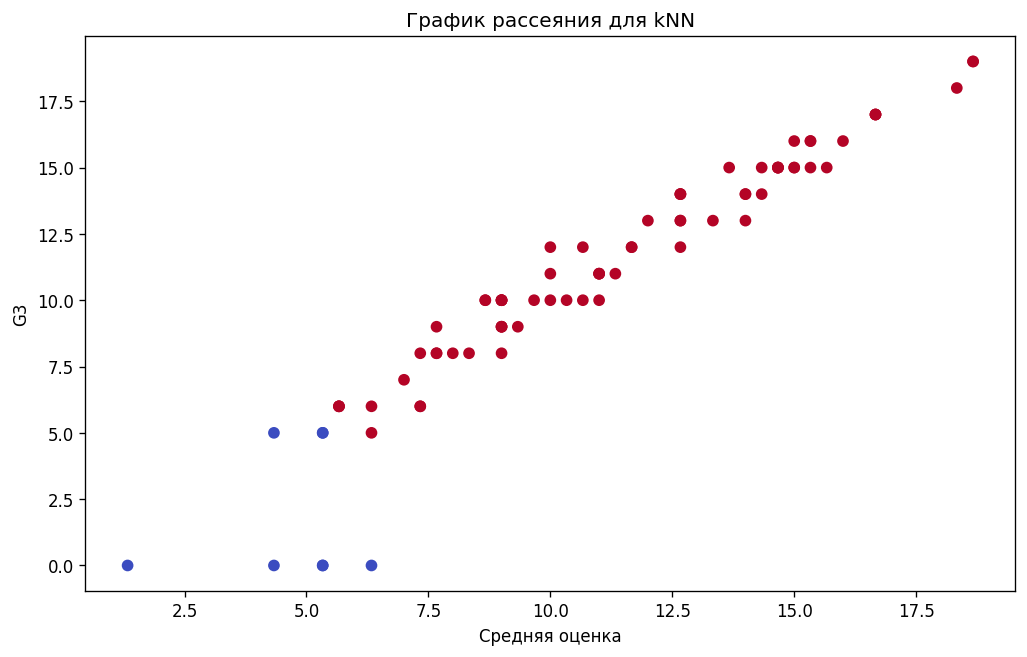

In [647]:
# Выбираем все столбцы с типом данных 'object' (строковые значения)
categorical_columns = df.select_dtypes(include=['object']).columns

# Создаем объект OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)  # drop='first' для избегания дамми-ловушки

# Применяем кодирование к выбранным столбцам
encoded_data = encoder.fit_transform(df[categorical_columns])

# Преобразуем результат в DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Объединяем закодированные столбцы с исходным DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Удаляем оригинальные категориальные столбцы, так как они больше не нужны
df.drop(categorical_columns, axis=1, inplace=True)

# Определяем наш целевой столбец и порог для успешной сдачи
target_column_name = 'pass_exam'

# Разделяем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(df.drop([target_column_name], axis=1), df[target_column_name], test_size=0.2, random_state=42)

# Создание модели kNN с двумя признаками
knn_model_2d = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')  

# Обучение модели на обучающих данных (используем два признака 'average_grade' и 'G3')
X_train_2d = X_train[['average_grade', 'G3']]
X_test_2d = X_test[['average_grade', 'G3']]
knn_model_2d.fit(X_train_2d, y_train)

# Предсказание на тестовых данных
y_pred_knn_2d = knn_model_2d.predict(X_test_2d)

# Оценка производительности модели (например, точность)
accuracy_2d = accuracy_score(y_test, y_pred_knn_2d)
print("Точность модели kNN с двумя признаками:", round(accuracy_2d * 100, 2))

# Построение графика рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X_test_2d['average_grade'], X_test_2d['G3'], c=y_pred_knn_2d, cmap='coolwarm')
plt.xlabel('Средняя оценка')
plt.ylabel('G3')
plt.title('График рассеяния для kNN')
plt.show()

Модель ARIMA (авторегрессия с интегрированным скользящим средним)
---

In [648]:
# Загрузка данных
data = pd.read_csv('DataSet1_3.csv')

# Вывод первых строк данных
print(data.head())

         Date    Open    High     Low   Close    Volume   Name
0  2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
1  2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2  2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
3  2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
4  2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL


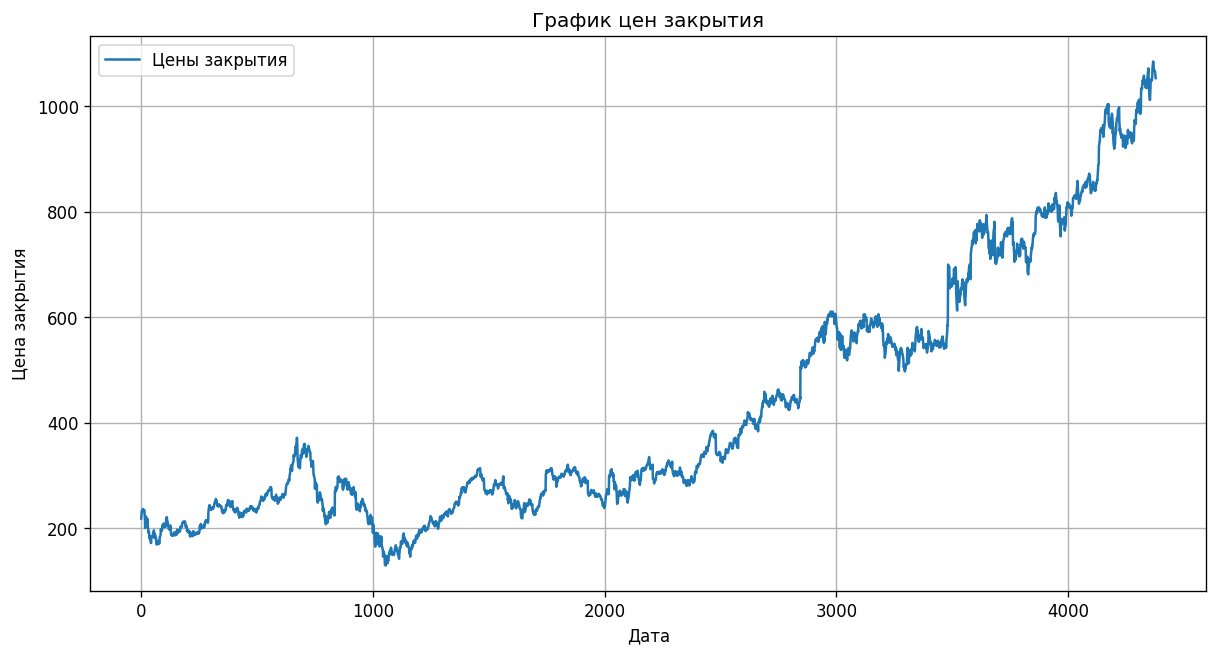

In [649]:
# Преобразование столбца 'Date' в формат datetime
data['Date'] = pd.to_datetime(data['Date'])
# data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
# start_date = pd.to_datetime('2006-01-03', format='%Y-%m-%d')
# data['Date'] = (data['Date'] - start_date).dt.days
# Установка 'Date' в качестве индекса
data.set_index('Date', inplace=True)
# Дату в секунды и часы

# Визуализация цен закрытия
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Цены закрытия')
plt.title('График цен закрытия')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.grid(True)
plt.show()

In [650]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.3224241360302158
p-value: 0.9967315857800989


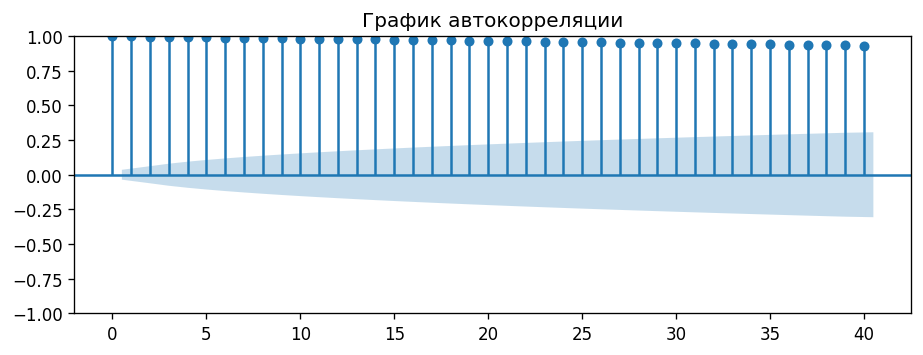

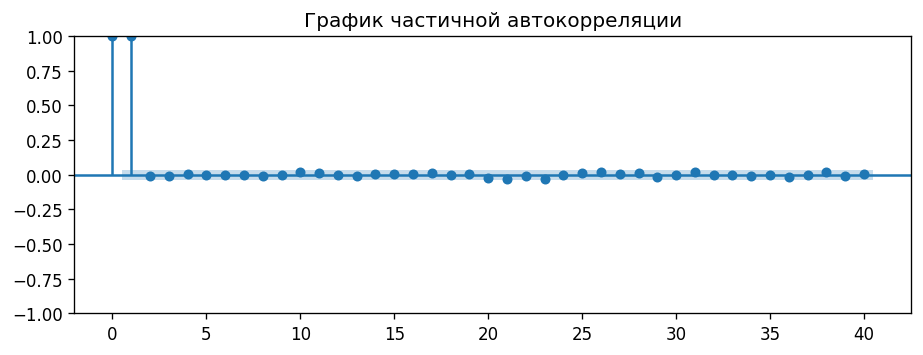

In [651]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# График автокорреляции
plot_acf(data['Close'], lags=40)
plt.title('График автокорреляции')
plt.show()

# График частичной автокорреляции
plot_pacf(data['Close'], lags=40)
plt.title('График частичной автокорреляции')
plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=20237.279, Time=9.04 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=20235.366, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=20236.936, Time=0.47 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=20236.998, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=20238.208, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=20237.317, Time=0.44 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=20237.316, Time=0.43 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=20238.074, Time=2.55 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=20234.993, Time=0.17 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=20236.935, Time=0.72 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=20237.844, Time=3.23 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=20236.547, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=20236.872, Time=0.75 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=20235.055, Time=0.27 sec
 ARIM

c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ASUS\Desktop\Studie\ML\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


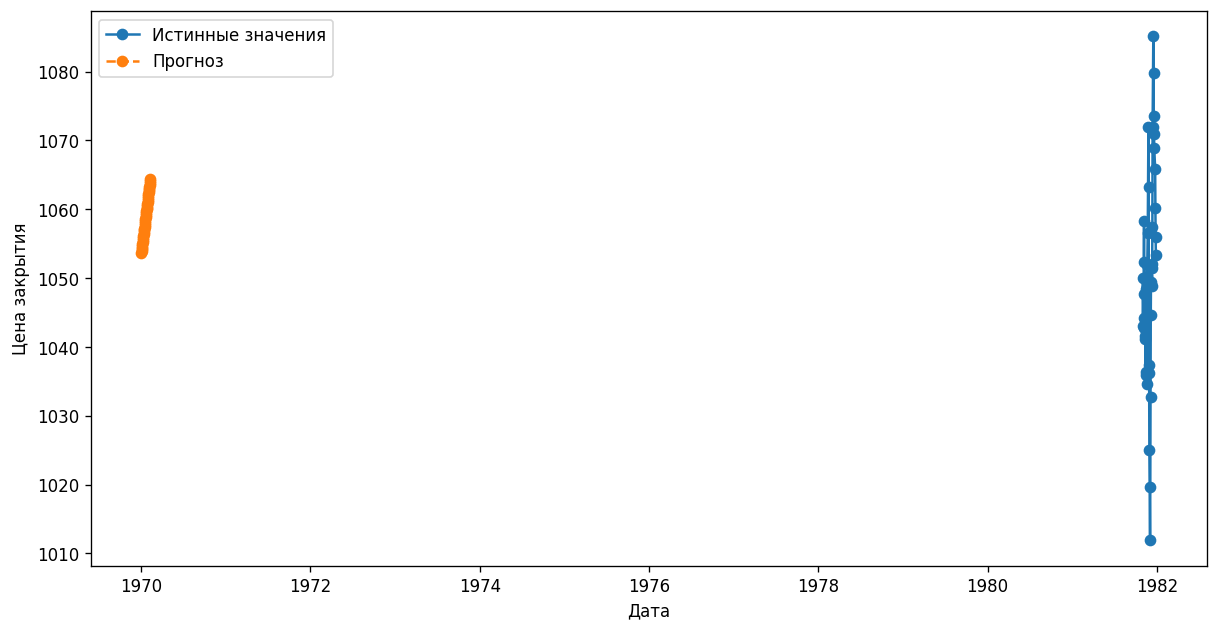

In [652]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Автоопределение параметров
model = auto_arima(data['Close'], seasonal=True, m=12, stepwise=True, trace=True)

# Обучение модели на целевом временном ряде
model.fit(data['Close'])

# Прогноз
n = 40  # Количество будущих периодов для прогноза
forecast = model.predict(n_periods=n)

# Создаем диапазон дат для будущих значений
forecast_dates = pd.date_range(start=data.index[-1], periods=n+1)

# Построение графика истинных значений и прогноза
plt.figure(figsize=(12, 6))
plt.plot(data.index[-n:], data['Close'].tail(n), label='Истинные значения', marker='o')
plt.plot(forecast_dates[1:], forecast, label='Прогноз', linestyle='--', marker='o')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.legend()
plt.show()

In [653]:
# # Прогнозирование будущих значений (измените n на количество будущих периодов, которые вы хотите предсказать)
# n = 30
# forecast = model_fit.forecast(steps=n)

# # Создаем диапазон дат вручную
# forecast_dates = pd.date_range(start=data.index[-1], periods=n+1)

# # Вывод прогнозных значений
# print("Прогнозные значения:")
# print(forecast)

# # График прогноза
# plt.figure(figsize=(12, 6))
# plt.plot(data.index[-n:], data['Close'].tail(n), label='Истинные значения', marker='o')
# plt.plot(forecast_dates, [data['Close'].iloc[-1]] + list(forecast), label='Прогноз', linestyle='--', marker='o')
# plt.xlabel('Дата')
# plt.ylabel('Цена закрытия')
# plt.title('Прогноз цены закрытия с использованием ARIMA')
# plt.legend()
# plt.show()